In [10]:
import math
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df = pd.DataFrame.from_csv("./data/housing_date_train_2_features.csv")
housing_df = df.loc[df['Neighborhood'].isin(["BrDale", "Blmngtn"])]

# Show me what were working with
print(len(housing_df))
print(housing_df)

33
      LotArea  SalePrice Neighborhood
Id                                   
220      3010     167240      Blmngtn
230      3182     192500      Blmngtn
386      3182     192000      Blmngtn
444      3922     172500      Blmngtn
466      3072     178740      Blmngtn
560      3196     234000      Blmngtn
598      3922     194201      Blmngtn
640      3982     264561      Blmngtn
791      3182     160200      Blmngtn
852      3196     215000      Blmngtn
983      3182     159895      Blmngtn
1005     3182     181000      Blmngtn
1020     3013     213490      Blmngtn
1024     3182     191000      Blmngtn
1127     3684     174000      Blmngtn
1395     4045     246578      Blmngtn
1416     3635     175900      Blmngtn
226      1680     112000       BrDale
228      1869     106000       BrDale
233      1680      94500       BrDale
236      1680      89500       BrDale
364      1680     118000       BrDale
431      1680      85400       BrDale
433      1920     122500       BrDale
501      

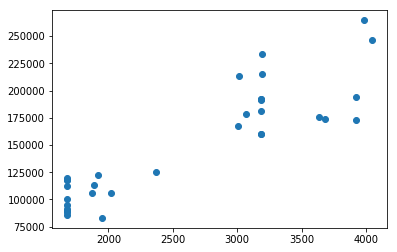

In [11]:
plt.scatter(housing_df.LotArea, housing_df.SalePrice)
plt.show()

### Let's see how these data points seperate by the neighborhood of each house

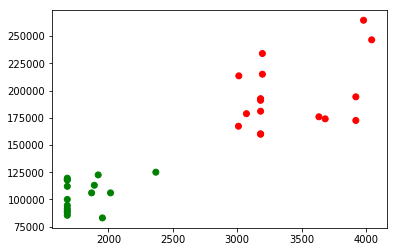

In [12]:
color= ['green' if n == "BrDale" else 'red' for n in housing_df.Neighborhood]
plt.scatter(housing_df.LotArea, housing_df.SalePrice, color=color)
plt.show()

### This data is very easily linearly seperable. Houses in green are in the BrDale neighborhood, and tend to be smaller and cheaper, whereas houses in red are in the Blmngton neighborhood, and tend to be larger and more pricey.

### I can draw a quick line through the data to see this easily:

## <img src="./img/linear_seperability.png"/>

# Logistic Regression

In [13]:
"""
Most of these functions are implemented in numpy, but we are 
writing each one in python here for your reference
"""

def neighborhood2int(n):
    """
    For mapping neighborhoods into integer labels
    """
    return 1 if n == "Blmngtn" else 0

def sigmoid(x, w):
    """
    Sigmoid function for "squashing" the output into a distribution
    """
    return 1 / (1 + np.exp(-x.dot(w)))

def logistic_loss(y_hat, y):
    """
    Compute the logistic loss
    This basically finds the negative of the log probability of class1 - its inverse
    """
    return (-y * np.log(y_hat)) - ((1 - y) * np.log(1 - y_hat))

def total_loss(w, X, y):
    """
    Average loss over all examples in a dataset
    """
    y = np.array(y)
    return 1/len(X) * sum(logistic_loss(sigmoid(X, w), y))

def normalize_feature_space(X):
    """
    Normalize X into smaller numbers in a space where the range of all feature values is comparable,
    while retaining their relative distance from one another.
    
    **MEAN NORMALIZATION**
    """
    return (X - np.mean(X, axis=0)) / np.std(X, axis=0)

"""
Set weights to 0 and 0, this will always return .5 when passed into the sigmoid function
Since e^0 is 1, i.e. 1 / 1 + 1

Note that no bias parameter has been implemented, this should be inconsequential for this task, but 
is good to do as a general rule of thumb
"""
w = np.zeros(2)
for ID, house in housing_df.iterrows():
    x = house[["LotArea", "SalePrice"]]
    y = neighborhood2int(house.Neighborhood)
    print("sigmoid: " + str(sigmoid(x, w)))
    print("loss: " + str(logistic_loss(sigmoid(x, w), y)))

sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0.5
loss: 0.69314718056
sigmoid: 0

In [14]:
cost = total_loss(w, housing_df[["LotArea", "SalePrice"]], [neighborhood2int(y) for y in housing_df.Neighborhood])
print(cost)

0.69314718056


## We need to tune the weight parameters w to minimize the cost above.
## Now that we have defined a training objective, we need an optimization function, e.g.  gradient descent

In [15]:
def grad_desc(w, X, y, lr=.01, converge=.0001, log=True):
    """
    Given a vector of initial weights, features matrix X, correct labels y, 
    a learning_rate and a change value at which to converge,
    We can optimize the weights w with the gradiant descent algorithm.
    
    Rather than the converge parameter, a held out 'dev' set could be used in order
    to evaluate the accuracy and allow that to determine convergence.
    
    Regularization could also be added to improve
    A decay rate could be tuned as well.
    """
    # Minimize the feature space
    X = normalize_feature_space(X)
    # Get initial cost
    cost = total_loss(w, X, y)
    # Set a default cost_change to track for convergence
    cost_change = 1.0
    gradient = np.zeros(len(w))
    i = 1
    while(cost_change > converge):
        if log:
            print("Epoch: " + str(i) + " Cost: " + str(cost) + " with weights: " + str(w))
        old_cost = cost
        """
        Calculate the gradient of the cost function with respect to w
        
        Note on numpy: (sigmoid(X, w) - y) is a vector of size (33), and X is a matrix of size (33, 2),
        so numpy is taking the dot product of the 33 dimensions of the derivative of the loss function and
        the 33 dimensions of each feature in x, and returning a vector of those 2 features
        
        E.g with 3 training examples and made up values:
        
        [.5, 
         .5,
         .5]
         
        [[.1, .2],
         [.1, .2],
         [.1, .2]]
         
        = [.15, .3]
        """
        
        """
        Compute the partial derivative of the loss function 
        w.r.t w at each dimension of the vector, aka (y_hat - y) * x
        in order to find the gradient
        """
        gradient = (sigmoid(X, w) - y).dot(X)
        
        """
        Update the parameters to the opposite of the gradiant * the learning rate
        
        We have to go in the negative direction in order to reduce the loss, because the difference
        between y_hat and y will be the opposite of the update we need to make.
        """
        w = w - (lr * gradient)
        
        # Update cost
        cost = total_loss(w, X, y)
        cost_change = old_cost - cost
        i+=1
    
    return w

X = housing_df[["LotArea", "SalePrice"]].as_matrix()
y = [neighborhood2int(house.Neighborhood) for ID, house in housing_df.iterrows()] 
print(grad_desc(w, X, y))

Epoch: 1 Cost: 0.69314718056 with weights: [ 0.  0.]
Epoch: 2 Cost: 0.56590748825 with weights: [ 0.15500453  0.14661888]
Epoch: 3 Cost: 0.474547705428 with weights: [ 0.28665628  0.26998469]
Epoch: 4 Cost: 0.40744543953 with weights: [ 0.39960889  0.37484977]
Epoch: 5 Cost: 0.356730807896 with weights: [ 0.49785836  0.46529856]
Epoch: 6 Cost: 0.317320414103 with weights: [ 0.58449688  0.54446942]
Epoch: 7 Cost: 0.285926870946 with weights: [ 0.66184299  0.61469329]
Epoch: 8 Cost: 0.260379842192 with weights: [ 0.73163368  0.6776996 ]
Epoch: 9 Cost: 0.239207676979 with weights: [ 0.79518503  0.73478679]
Epoch: 10 Cost: 0.221385031114 with weights: [ 0.85350961  0.7869457 ]
Epoch: 11 Cost: 0.206179098211 with weights: [ 0.90739907  0.8349453 ]
Epoch: 12 Cost: 0.193053894659 with weights: [ 0.95748198  0.87939216]
Epoch: 13 Cost: 0.181609178627 with weights: [ 1.00426458  0.92077198]
Epoch: 14 Cost: 0.171540481357 with weights: [ 1.04815993  0.95947897]
Epoch: 15 Cost: 0.162612321428 wit

<img src="./img/grad_desc_gif.gif"/>

In [16]:
"""
split the data into train/test and then evaluate our predictions
"""
train_length = int(X.shape[0] * 0.8)
print(X)
train_X = X[:train_length]
test_X = X[train_length:]

optimized_w = grad_desc(w, train_X, y[:train_length])

[[  3010 167240]
 [  3182 192500]
 [  3182 192000]
 [  3922 172500]
 [  3072 178740]
 [  3196 234000]
 [  3922 194201]
 [  3982 264561]
 [  3182 160200]
 [  3196 215000]
 [  3182 159895]
 [  3182 181000]
 [  3013 213490]
 [  3182 191000]
 [  3684 174000]
 [  4045 246578]
 [  3635 175900]
 [  1680 112000]
 [  1869 106000]
 [  1680  94500]
 [  1680  89500]
 [  1680 118000]
 [  1680  85400]
 [  1920 122500]
 [  1890 113000]
 [  1680  88000]
 [  1680 100000]
 [  1680 118000]
 [  2016 106000]
 [  1680  91500]
 [  1680 119500]
 [  2368 125000]
 [  1953  83000]]
Epoch: 1 Cost: 0.69314718056 with weights: [ 0.  0.]
Epoch: 2 Cost: 0.603327072482 with weights: [ 0.1156266   0.10721565]
Epoch: 3 Cost: 0.533812930565 with weights: [ 0.21769874  0.20094944]
Epoch: 4 Cost: 0.479400024031 with weights: [ 0.30826606  0.2832789 ]
Epoch: 5 Cost: 0.436123864728 with weights: [ 0.38923895  0.356147  ]
Epoch: 6 Cost: 0.401104130679 with weights: [ 0.46224729  0.42120887]
Epoch: 7 Cost: 0.372282423194 with 

In [17]:
# Make predictions
preds = [sigmoid(x, optimized_w) for x in normalize_feature_space(test_X)]

print(y)
# Compare to labels
print([(x, y) for x, y in zip(preds, y[train_length:])])


[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[(0.023602723907705209, 0), (0.36476532396583689, 0), (0.89316165699426264, 0), (0.0053868265066288959, 0), (0.42781788844290747, 0), (0.9999720576065334, 0), (0.056126534597605117, 0)]


In [18]:
print(y[:train_length])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### The train data was a majority class 1, and held every single class 1 example
### We need to randomize the data to reduce this bias

In [19]:
"""
The train data above was almost exclusively class 1, we need 
to randomize the train and test data in order to ensure a more representative sample
"""
# Grab X and its labels as a single matrix
dataset = housing_df[["LotArea", "SalePrice", "Neighborhood"]].as_matrix()

# 'shuffle' the matrix to randomize the position of each sample in it
np.random.shuffle(dataset)

# Not sure why shuffling changed the type, but need to 
# change the type of each scalar in X for some numpy methods to work
X = dataset[:, :2].astype('int64')
# Encode the labels
y = [neighborhood2int(s) for s in dataset[:, 2]]

# Find the length of 80% of the dataset for training data
train_length = int(X.shape[0] * 0.8)

# split 80%/20% for train and test
train_X = X[:train_length]
test_X = X[train_length:]

optimized_w = grad_desc(w, train_X, y[:train_length], log=False)

print(optimized_w)

# Normalize the test values so the inputs are in the same space as the train data
test_X = normalize_feature_space(test_X)
preds = [sigmoid(x, optimized_w) for x in test_X]

# Compare to labels
print([(x, y) for x, y in zip(preds, y[train_length:])])

[ 2.52579173  2.2008438 ]
[(0.74585163637042906, 1), (0.99488312295836145, 1), (0.029764309402710635, 0), (0.0021027075821252643, 0), (0.95402161291470822, 1), (0.0040635919312919464, 0), (0.9968870458330179, 1)]


In [23]:
# TEST DIFFERENT LEARNING RATES

dataset = housing_df[["LotArea", "SalePrice", "Neighborhood"]].as_matrix()

np.random.shuffle(dataset)
X = dataset[:, :2].astype('int64')
y = [neighborhood2int(s) for s in dataset[:, 2]]

for lr in [.02, .03, .04, .05, .1, .15, .2, .25, .3]:
    print("TESTING LEARNING RATE %.2f" % lr)
    train_length = int(X.shape[0] * 0.8)

    train_X = X[:train_length]
    test_X = X[train_length:]

    optimized_w = grad_desc(w, train_X, y[:train_length], lr=lr)

    # Normalize the test values so the inputs are in the same space as the train data
    test_X = normalize_feature_space(test_X)
    preds = [sigmoid(x, optimized_w) for x in test_X]

    # Compare to labels
    print([(x, y) for x, y in zip(preds, y[train_length:])])

TESTING LEARNING RATE 0.02
Epoch: 1 Cost: 0.69314718056 with weights: [ 0.  0.]
Epoch: 2 Cost: 0.502170950617 with weights: [ 0.24167068  0.23362045]
Epoch: 3 Cost: 0.390009425756 with weights: [ 0.42644014  0.41051958]
Epoch: 4 Cost: 0.319150594555 with weights: [ 0.57268227  0.54923163]
Epoch: 5 Cost: 0.27096526129 with weights: [ 0.69286407  0.66229007]
Epoch: 6 Cost: 0.236206242707 with weights: [ 0.79469431  0.75739699]
Epoch: 7 Cost: 0.209964344631 with weights: [ 0.88303616  0.83938209]
Epoch: 8 Cost: 0.189439081896 with weights: [ 0.96109158  0.91140847]
Epoch: 9 Cost: 0.172929519839 with weights: [ 1.03106035  0.97563919]
Epoch: 10 Cost: 0.159347045299 with weights: [ 1.09451123  1.03361062]
Epoch: 11 Cost: 0.147963984458 with weights: [ 1.15259917  1.0864498 ]
Epoch: 12 Cost: 0.138275936686 with weights: [ 1.20619766  1.13500642]
Epoch: 13 Cost: 0.129922384294 with weights: [ 1.25598274  1.17993615]
Epoch: 14 Cost: 0.122638826665 with weights: [ 1.30248797  1.22175514]
Epoch: